# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


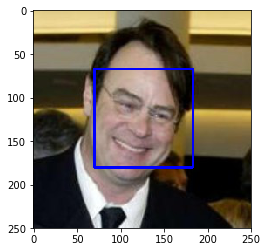

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
* 98% of human faces were detected in the first 100 images of `human_files`.
* In 17% of the first 100 images of `dog_files` a human face was detected.

In [4]:
from tqdm import tqdm, tqdm_notebook

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

### TODO: Test the performance of the face_detector algorithm 
### on the images in human_files_short and dog_files_short.
def test_performance(detection_algorithm, test_dataset, *args):
    '''
    Applies a detection algorithm to a dataset of images.
    
    Args:
        detection_algorithm: a detection algorithm, e.g. face detection algorithm
        test_dataset: an array-like of strings indicating the path of images 
        
    Returns:
        classifier_hits: number of times the algorithm has detected an object
        skipped_images: a list of the images that were not recognized by the algorithm, e.g. not recognised as faces
    '''
    algorithm_hits = 0
    skipped_images = []

    print('Applying detection algorithm to provided images...')
    
    for image_file in tqdm_notebook(test_dataset):
        if detection_algorithm(image_file, *args) is True:
            algorithm_hits += 1
        else:
            skipped_images.append(image_file)
    
    return algorithm_hits, skipped_images


# Applying the detection algorithm as requested
true_positives_human, not_faces_in_human = test_performance(face_detector, human_files_short)
false_positives_human, not_faces_in_dogs = test_performance(face_detector, dog_files_short)

# printing out requested value of accuracy
print(f'Human faces recognized in human pictures: {true_positives_human/len(human_files_short) * 100}%')
print(f'Human faces recognized in dog pictures: {false_positives_human/len(dog_files_short) * 100}%')

Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


Human faces recognized in human pictures: 98.0%
Human faces recognized in dog pictures: 17.0%


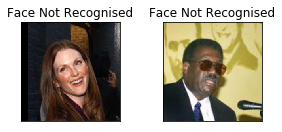

In [5]:
#==========================================================
# I wanted to see what faces were not recognized.
# Glasses and (probably) background confused the classifier.
#=========================================================
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pics_from_list(pic_list, fig_title):
    '''
    function to plot all images from a list `pic_list` 
    giving them the titles in the list fic_list.
    '''
    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 4))
    # display 20 images
    for idx, file_path in enumerate(pic_list):
        ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
        img_ = plt.imread(file_path)
        plt.imshow(img_)
        ax.set_title(fig_title)

# show not recognized faces
plot_pics_from_list(not_faces_in_human, 'Face Not Recognised')

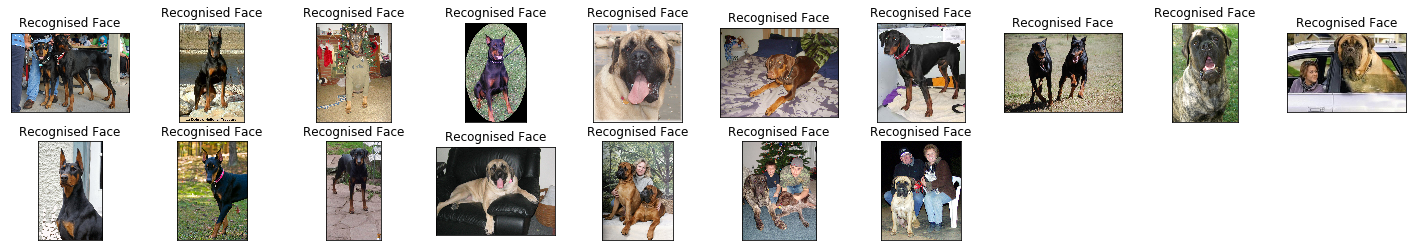

In [6]:
#=================================================================
# I wanted to see what dogs images were recognised as human faces. 
# Some actually include humans!
#=================================================================
# select the images where a dog was recognised as human face
faces_in_dogs = list(set(dog_files_short) - set(not_faces_in_dogs))

# show faces identified in dogs dataset
plot_pics_from_list(faces_in_dogs, 'Recognised Face')

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
else:
    VGG16 = VGG16.cpu()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 98155119.95it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms

# added by Luca
import torch.nn.functional as F

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # read the image as pillow image
    img = Image.open(img_path)
    
    # define the transformation
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224), #as in the original VGG paper
                                     transforms.ToTensor(),
                                     normalize])
    # apply the transformation
    img_input = preprocess(img)
    input_batch = img_input.unsqueeze_(0)
    
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        VGG16.to('cuda')

    with torch.no_grad():
        output = VGG16(input_batch)
    
    probs = F.softmax(output[0], dim=0)
    #print(probs.shape)
    # https://pytorch.org/docs/stable/torch.html#torch.topk
    top_prob, top_class = probs.topk(1, dim=0)

    return top_class.squeeze(), top_prob.squeeze()# predicted class index

# testing the function
test_img = dog_files_short[1]
pred_class, pred_prob = VGG16_predict(test_img)
print(f'Predicted class #{pred_class} (probability: {pred_prob:.3f})')

Predicted class #243 (probability: 0.960)


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    is_dog = False
    ind, prob = VGG16_predict(img_path)
    # is_dog is true only when within the designeted dic keys
    if ind>=151 and ind<=268:
        is_dog = True
    return is_dog

# testing
test_img = dog_files_short[1]
#Image.open(test_img)
dog_detector(test_img)

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

When using VGG16:
* 1% of images in `human_files_short` have a detected dog
* Between 99% and 100% of images in `dog_files_short` have a detected dog (depends on selected `human_files_short` I guess)


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
false_positives_dog, not_dog_in_humans = test_performance(dog_detector, human_files_short)
true_positives_dog, not_dog_in_dogs = test_performance(dog_detector, dog_files_short)

# printing out requested value of accuracy
print(f'Dogs recognized in human pictures: {false_positives_dog/len(human_files_short) * 100}%')
print(f'Dogs recognized in dog pictures: {true_positives_dog/len(dog_files_short) * 100}%')

Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


Dogs recognized in human pictures: 1.0%
Dogs recognized in dog pictures: 99.0%


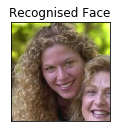

In [12]:
# select the images where a dog was recognised as human face
dogs_in_faces = list(set(human_files_short) - set(not_dog_in_humans))
# show dogs identified in human dataset
plot_pics_from_list(dogs_in_faces, 'Recognised Face')

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
import torch
import torchvision.models as models

# define model
models_to_test = {'Inceptionv3': models.inception_v3(pretrained=True), 
                  'ResNet50': models.resnet50(pretrained=True), 
                  'DenseNet121': models.densenet121(pretrained=True)}


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:05<00:00, 18973355.31it/s]
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 89782487.85it/s]
/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:01<00:00, 23560783.33it/s]


In [14]:
def trained_net_predict(img_path, trained_net):
    '''

    Args:
        img_path: path to an image
        
    Returns:
        trained model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # read the image as pillow image
    img = Image.open(img_path)
    
    # define the transformation
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
    if isinstance(trained_net, models.inception.Inception3):
        # see https://pytorch.org/hub/pytorch_vision_inception_v3
        #print('cropping for inception net')
        preprocess = transforms.Compose([transforms.Resize(299),
                                     transforms.CenterCrop(299), 
                                     transforms.ToTensor(),
                                     normalize])
    else:    
        #print('cropping for other nets')
        preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224), 
                                     transforms.ToTensor(),
                                     normalize])
    # apply the transformation
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)
    
    # evaluation mode: freeze batchnorm and dropout layers
    trained_net.eval()
    
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        trained_net.to('cuda')
    
    with torch.no_grad():
        output = trained_net(input_batch)
        
    probs = F.softmax(output[0], dim=0)
    #print(probs.shape)
    # https://pytorch.org/docs/stable/torch.html#torch.topk
    top_prob, top_class = probs.topk(1, dim=0)
    
    #trained_net.train()
    
    #print(top_prob)
    return top_class.squeeze(), top_prob.squeeze()# predicted class index

# testing the function
test_img = dog_files_short[3]
pred_class, pred_prob = trained_net_predict(test_img, models_to_test['Inceptionv3'])
print(f'Predicted class #{pred_class} (probability: {pred_prob:.3f})')
pred_class, pred_prob = trained_net_predict(test_img, models_to_test['ResNet50'])
print(f'Predicted class #{pred_class} (probability: {pred_prob:.3f})')

Predicted class #243 (probability: 0.864)
Predicted class #243 (probability: 0.970)


In [15]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_trained_net(img_path, trained_net):
    ## TODO: Complete the function.
    is_dog = False
    ind, prob = trained_net_predict(img_path, trained_net)
    # is_dog is true only when within the designeted dic keys
    if ind>=151 and ind<=268:
        is_dog = True
    return is_dog

In [16]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

for net_name in models_to_test.keys():
    false_positives_dog, not_dog_in_humans = test_performance(dog_detector_trained_net,
                                                          human_files_short, models_to_test[net_name])
    true_positives_dog, not_dog_in_dogs = test_performance(dog_detector_trained_net,
                                                       dog_files_short, models_to_test[net_name])

    # printing out requested value of accuracy
    print('---------------------------------------------------')
    print(f'Assessing performance of pretrained {net_name}')
    print('---------------------------------------------------')
    print(f'Dogs recognized in human pictures: {false_positives_dog/len(human_files_short) * 100}%')
    print(f'Dogs recognized in dog pictures: {true_positives_dog/len(dog_files_short) * 100}%')
    print('---------------------------------------------------')

Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


---------------------------------------------------
Assessing performance of pretrained Inceptionv3
---------------------------------------------------
Dogs recognized in human pictures: 1.0%
Dogs recognized in dog pictures: 100.0%
---------------------------------------------------
Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


---------------------------------------------------
Assessing performance of pretrained ResNet50
---------------------------------------------------
Dogs recognized in human pictures: 0.0%
Dogs recognized in dog pictures: 100.0%
---------------------------------------------------
Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


Applying detection algorithm to provided images...


HBox(children=(IntProgress(value=0), HTML(value='')))


---------------------------------------------------
Assessing performance of pretrained DenseNet121
---------------------------------------------------
Dogs recognized in human pictures: 0.0%
Dogs recognized in dog pictures: 100.0%
---------------------------------------------------


# Optional Results

## Inception v3
When using Inception-v3:
* 1% of images in `human_files_short` have a detected dog
* 100% of images in `dog_files_short` have a detected dog

## ResNet-50
When using ResNet-50:
* 0% of images in `human_files_short` have a detected dog
* 100% of images in `dog_files_short` have a detected dog

## DenseNet-121
When using DenseNet-121:
* 0% of images in `human_files_short` have a detected dog
* 100% of images in `dog_files_short` have a detected dog


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

image_dir = '/data/dog_images'

# define datasets for train and validation using dictionary comprehension as in pytorch examples 
data_transforms = {'train': transforms.Compose([transforms.Resize(256), 
                                                transforms.RandomResizedCrop(224),#
                                                transforms.ColorJitter(),
                                                transforms.RandomRotation(25),
                                                transforms.RandomHorizontalFlip(),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                     std=[0.229, 0.224, 0.225])]),
                   'valid': transforms.Compose([transforms.Resize(256), 
                                                transforms.CenterCrop(224),#transforms.RandomHorizontalFlip(),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                    
                                                                     std=[0.229, 0.224, 0.225])]),
                   'test':  transforms.Compose([transforms.Resize(256), 
                                                transforms.CenterCrop(224),
                                                transforms.ToTensor(), 
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                     std=[0.229, 0.224, 0.225])])
                       }
            
# create imagefolders as dictionaties
dts = {x: datasets.ImageFolder(os.path.join(image_dir, x), data_transforms[x]) for x in ['train', 'valid', 'test'] }

# create data loaders as dictionaries
loaders_scratch = {x: torch.utils.data.DataLoader(dts[x],
                                              batch_size=128,
                                              num_workers=0,
                                              shuffle=True)
                                              for x in ['train', 'valid','test'] }

In [18]:
# get the classes labels from the dataset (they are a list in this format '001.dog_breed' etc)
dog_classes = dts['train'].classes

# clean the labels list so they can be used without numbers
dog_breed_labels = [dog_classes[n][dog_classes[n].find('.')+1:] for n in range(len(dog_classes))]

# length of 
N_labels = len(dog_breed_labels)

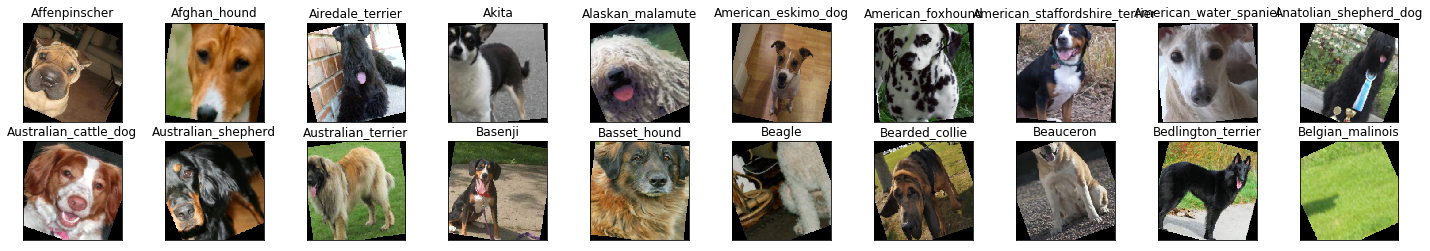

In [19]:
import numpy as np

# NB: normalising requires clipping!
# NB: transpose is used to move axis around

# obtain one batch of training images
check_images, labels = next(iter(loaders_scratch['train']))

#########################################################
# I want to have an idea of the images to be processed
#########################################################
# plot some images from the batch (code from Udacity notebooks)
fig = plt.figure(figsize=(25, 4))
# values for denormalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # denormalise
    inp = check_images[idx]
    np_image = inp.numpy().transpose((1, 2, 0))
    np_image = std * np_image + mean
    np_image = np.clip(np_image, 0,1)
    plt.imshow(np_image)
    ax.set_title(dog_breed_labels[idx])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* the images in input (HxWxC) are resized to 254x254x3 and subsequently further cropped to 224x224. This choice was taken in consistency with the exisisting literature on network architectures, which, with the exception of Inception-v3, seems to use 224x224 from AlexNet forward. I have quickly realised that by choosing smaller input tensors I could have built a deeper network because of less memory consumption, but I have decided to compromise the network architeture to maintain the 224x224x3 input size.  I prioritised having a clear view of the dog appearance.
* I decided to augment the train dataset but not the validation and test dataset, as also found in the literature, e.g. "Deep Lerning with Python" by Chollet. I decided to augment the training images with:
    * a RandomResizeCrop: I have resized images with a relatively random large crop so that the network can learn to recognised the dog from part of the images. This is also equivalent to applying a translation, as the cropped part of the image will be in a different position.
    * a ColorJitter: I have read in the VGG paper that this can help the network in learning geometrical and shape patterns independently from their color.
    * an HorizontalFlip and RandomRotation: these are a standard augmentations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture   
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.init_chan = 32
        self.cnn1 = nn.Conv2d(3,                self.init_chan,   6, stride=2 , padding=2)
        self.cnn2 = nn.Conv2d(self.init_chan,   self.init_chan*2, 6, stride=2 , padding=2)
        self.cnn3 = nn.Conv2d(self.init_chan*2, self.init_chan*4, 6, stride=2 , padding=2)
        self.fc1  = nn.Linear(4*4*self.init_chan*4, 512) 
        self.fc2  = nn.Linear(512, N_labels) 
    
    def forward(self, x):
        ## Define forward behavior
        # first convolutional block
        x = F.relu(self.cnn1(x))# 112x32
        x = F.max_pool2d(x,2,2)# 56x32
        
        # second conv block
        x = F.relu(self.cnn2(x))# 28x64
        x = F.max_pool2d(x,2,2)# 14x64
        
        # third conv block
        x = F.relu(self.cnn3(x))# 7x128
        x = F.max_pool2d(x, 3, stride=2, padding=1)# 4x4*128
        
        # fully connected (2 layers)
        x = x.view(-1, 4*4*self.init_chan*4)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = self.fc2(x) 

        return x
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

## Steps to final architecture

My final architecture is a sequence of three convolutional blocks (convolutional layer with ReLU activation and MaxPooling layer) follower by two final (linear) fully connected layers.

1. Initially I naively implemented very deep but simple architectures, similar to VGG. __MOTIVATION:__ Based on the structure of the most successful architectures for image recognition, I knew that depth of the network was crucial parameter, so I wanted to have the convolutional layer to be as deep as possible. __ISSUE__: I was often running out of memory.

2. Initially I was also using small (3x3) convolutional kernels, trying to maintain the initial dimensions of the input tensor in the convolutional layers. __MOTIVATION__: I knew that, since the VGG paper and in contrast with previous works such as AlexNet and LeNet, small convolutional kernels (3x3) have been shown to be very effective as long as the network depth is increasing. __ISSUE__: my final connected layers, after flattening the feature maps, were generally huge in terms of units and number of parameters. Again, I was running out of memory.

3. Based on the above observations, I worked with the aim of finding a compromise to:
        * have an architecture as deep as possible (in terms of channels)
        * progressively reduce the size of the tensor in each convolutional layer as well as maxpooling layer.
        * maintain at least two fully connected layers of reasonable size at the end of the network.
I worked towards my objective using appropriate padding and filter sizes. The last maxpooling layer could not half the size of the feature maps, which were 7x7, so I designed it to generate 4x4 feature maps instead.
        
4. Being aware of the tendence of fully connected layers to overfit training data, I also included a dropout layer before the final classification layer. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
# REMEMBER THAT for C-E loss "the losses are averaged across observations for each minibatch."
# see https://pytorch.org/docs/stable/nn.html?highlight=cross%20entropy#torch.nn.CrossEntropyLoss
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [43]:
# some images appear to be truncated
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        #print('initialised epoch')
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):

            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                ## find the loss and update the model parameters accordingly
                ## record the average training loss, using something like
                ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                # clear the grad
                optimizer.zero_grad()
                # step forward
                output = model.forward(data)
                # compute loss
                loss = criterion(output, target)
                # backward step
                loss.backward()
                # optimizer step
                optimizer.step()
                train_loss += loss.item() * data.size(0)
        else:
            train_loss /= len(data)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                output_val = model(data)
                loss = criterion(output_val, target)
            ## update the average validation loss
                valid_loss += loss.item() * data.size(0)
        else:
            valid_loss /= len(data)
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss<=valid_loss_min:
            print(f'Valid loss new minimum: {valid_loss:.3f}. Saving model as {save_path}.')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            not_better_iter = 0
        else:
            not_better_iter += 1
            if not_better_iter == 5:
                for param_group in optimizer_scratch.param_groups:
                    print('Time to update the learning rate!')
                    param_group['lr'] /= 10
                    not_better_iter = 0
                
    # return trained model
    return model


# train the model
n_epochs = 50
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                     criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 912.333178 	Validation Loss: 43.967904
Valid loss new minimum: 43.968. Saving model as model_scratch.pt.
Epoch: 2 	Training Loss: 870.702025 	Validation Loss: 44.322371
Epoch: 3 	Training Loss: 864.845565 	Validation Loss: 45.230222
Epoch: 4 	Training Loss: 852.586528 	Validation Loss: 45.252770
Epoch: 5 	Training Loss: 854.465125 	Validation Loss: 45.074999
Epoch: 6 	Training Loss: 849.268456 	Validation Loss: 44.127409
Time to update the learning rate!
Epoch: 7 	Training Loss: 801.668696 	Validation Loss: 43.238681
Valid loss new minimum: 43.239. Saving model as model_scratch.pt.
Epoch: 8 	Training Loss: 790.859069 	Validation Loss: 43.462833
Epoch: 9 	Training Loss: 784.537458 	Validation Loss: 43.405699
Epoch: 10 	Training Loss: 781.039079 	Validation Loss: 43.521758
Epoch: 11 	Training Loss: 772.762263 	Validation Loss: 43.538074
Epoch: 12 	Training Loss: 773.078117 	Validation Loss: 43.731854
Time to update the learning rate!
Epoch: 13 	Training Loss: 762

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [44]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.395433


Test Accuracy: 22% (190/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders

# I decided to used the same as scratch model because the size of the images are 
# consistent with the pre-trained networks (apart from Inception-v3)
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn
#N_labels = 133
## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# print(vgg16.classifier)
input_class = model_transfer.classifier[3].in_features
model_transfer.classifier[3] = nn.Linear(input_class, 1024)
model_transfer.classifier[6] = nn.Linear(1024, N_labels)

# freeze feature parameters 
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
# freeze also first layer of classifier, which is massive
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Mu architecture for this task uses transfer learning from a pretrained network as normally implemented for small dataset with similar data to the original training dataset.  

The step for the implementation were:

1. I checked in details the architecture of VGG-16 and its implementation in PyTorch. I chose VGG because it has comparable performance to more complex architectures (see optional part of Step 2) but I could fully understand the source code.

2. VGG has a 'classifier' part of the architecture composed by three fully connected layers, which are performing the classification based on the features detected by the earlier convolutional blocks. I decided to modify the last two fully connected layers by reducing the number of their units, leaving activation and dropout unchanged. In details:
        * the units of the intermediate layer were reduced from 4096 to 1024
        * the units of the last layer were set to 133, which is the number of dog breeds (our classes)

3. I froze the gradient calculation for all parameters in the "features" part of the network.

4. I trained for less epochs than the network trained from scratch because only the weights of three layers will be modified.

__MOTIVATION__
I believe this is a suitable architecture for this task because the pretrained VGG-16 model has been trained on the ImageNet dataset, which among its 1000 classes already includes 118 dog breeds (classes 151-268). This means that its convolutional layers ('features' network section) already include enough information to discriminate dog breeds and just needs a new classifier for extending the classification to the new 133 classes.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
import torch.optim as optim
# the previous setting seemed should be ok, so I used them again
# criterion
criterion_transfer = nn.CrossEntropyLoss()
#optimizer
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [30]:
# train the model

# I expect few epochs to be sufficient
n_epochs = 7
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1106.590744 	Validation Loss: 18.135066
Valid loss new minimum: 18.135. Saving model as model_transfer.pt.
Epoch: 2 	Training Loss: 771.018861 	Validation Loss: 14.553051
Valid loss new minimum: 14.553. Saving model as model_transfer.pt.
Epoch: 3 	Training Loss: 720.894693 	Validation Loss: 13.301603
Valid loss new minimum: 13.302. Saving model as model_transfer.pt.
Epoch: 4 	Training Loss: 680.172206 	Validation Loss: 12.283723
Valid loss new minimum: 12.284. Saving model as model_transfer.pt.
Epoch: 5 	Training Loss: 651.578559 	Validation Loss: 11.183968
Valid loss new minimum: 11.184. Saving model as model_transfer.pt.
Epoch: 6 	Training Loss: 644.557415 	Validation Loss: 11.313744
Epoch: 7 	Training Loss: 638.855060 	Validation Loss: 10.690637
Valid loss new minimum: 10.691. Saving model as model_transfer.pt.


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer.eval()
with torch.no_grad():
    test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.876174


Test Accuracy: 71% (600/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [30]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

data_transfer = dts
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # read the image as pillow image
    img = Image.open(img_path)
    
    # define the transformation
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([transforms.CenterCrop(224), 
                                     transforms.ToTensor(),
                                     normalize])
    # apply the transformation
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0) 
    
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model_transfer.to('cuda')
    
    model_transfer.eval()
    
    with torch.no_grad():
        output = model_transfer(input_batch)
    
    probs = F.softmax(output[0], dim=0)
    
    # https://pytorch.org/docs/stable/torch.html#torch.topk
    top_prob, top_class = probs.topk(5, dim=0)
    
    dog_breed = class_names[top_class[0]]
    
    return dog_breed, top_prob, top_class

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [31]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
    ## handle cases for a human face, dog, and neither
    score = 0
    # check if dog
    if dog_detector(img_path):
        score += 1
        
    # check if human
    if face_detector(img_path):
        score += 2
    
    # predict the breed    
    dog_breed, top_prob, top_class = predict_breed_transfer(img_path)
    
    # show the comparisons
    view_classify(img_path, top_class, top_prob, score) 
    
    
    return None
        

In [38]:
def view_classify(img_path, top_class, top_prob, score):
    ''' Function for viewing dog pictures and their predicted breed.
    '''
    top_prob = top_prob.to('cpu')
    top_class = top_class.to('cpu')
    top_prob = top_prob.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)  
    
    img = plt.imread(img_path)
    
    # show the dog in figure 1
    ax1.imshow(img)
    ax1.set_yticks([])
    ax1.set_xticks([])
    font_size = 'large'
    if score == 1:
        ax1.set_title('You are a nice dog...')
        ax1.set_xlabel(f'...You remind me of a {class_names[top_class[0]]}!', fontsize=font_size)
    elif score == 2:
        ax1.set_title('You are a nice human...')
        ax1.set_xlabel(f'...Are you a {class_names[top_class[0]]}?', fontsize=font_size)
    elif score == 3:
        ax1.set_title('You are a nice dog-human couple...')
        ax1.set_xlabel(f'...Is your dog a {class_names[top_class[0]]}?', fontsize=font_size)
    elif score == 0:
        ax1.set_title('I am not sure I know if you are a dog or a human...')
        ax1.set_xlabel(f'...but you remind me of a {class_names[top_class[0]]}!', fontsize=font_size)
    
    # show the classes in plot 2 (similar to intro to pyTorch code)
    ax2.barh(np.arange(len(top_prob)), top_prob)
    ax2.set_aspect(0.13)
    ax2.set_yticks(np.arange(6))
    # tricky tensor!
    ax2.set_yticklabels([class_names[n] for n in top_class])
    ax2.set_title('Dog Breeds')
    ax2.set_xlim(0, 1.1)
    ax2.set_xlabel('Class Probability')
    plt.tight_layout()


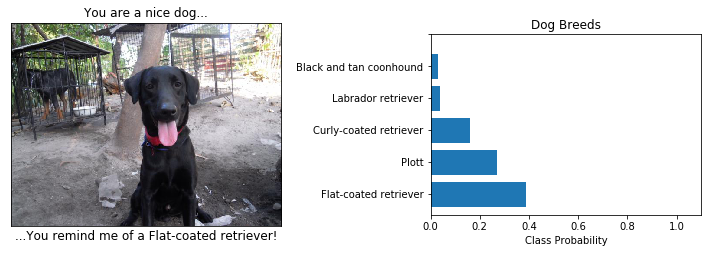

In [39]:
# testing
test_img = './images/Labrador_retriever_06449.jpg'
#dog_breed, top_prob, top_class = predict_breed_transfer('./images/Labrador_retriever_06449.jpg')

# testing
#view_classify(test_img, top_class, top_prob)
    
# Image.open(test_img)
run_app('./images/Labrador_retriever_06449.jpg')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1. It would be nice to have a face detection algorithm with an accuracy threshold, to remove human faces detected on dog pictures by rising the threshold .
2. A better face detection could used, the current cascade classifier does not seem to work well on lateral faces or covered faces, e.g. see the pictures misclassifies in task 1 and on the pic of Usain Bolt below.
3. The output is interesting. When the network is sure of a prediction is generally correct. When the prediction is incorrect, or refers to a human, presents very low probabilities. I think there is huge margin for improvements, especially by using some technique like GlobalPooling, which I did not have the time to test. That would allow to implement deeper networks by reducing the computational cost of the fully connected layers.
4. Implementing a Flask app and running it on a AWS instance would be very cool also.

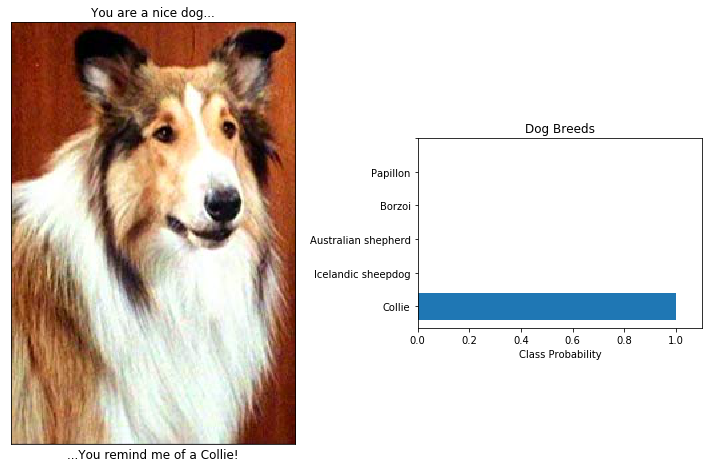

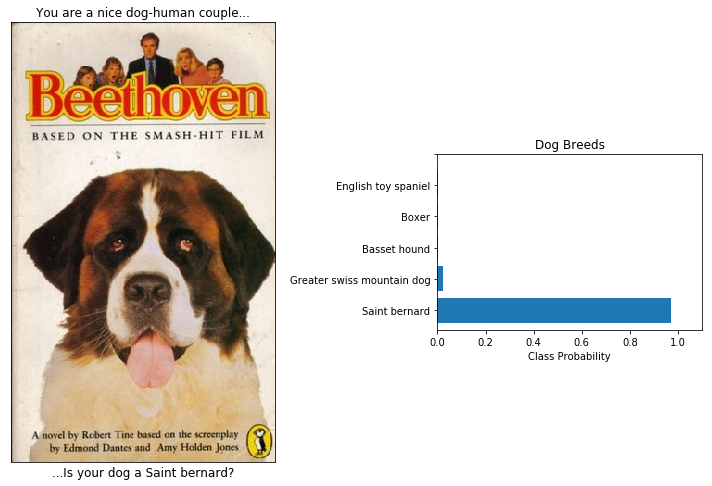

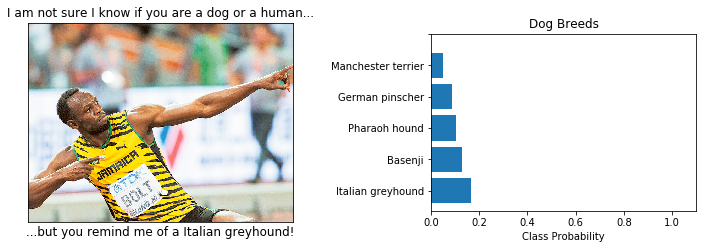

In [40]:
# testing
from PIL import Image
run_app('./luca_images/lassie.jpg')
run_app('./luca_images/beethoven.jpg')
run_app('./luca_images/usain-bolt.jpg')


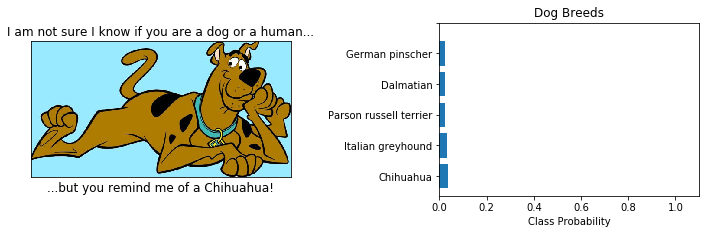

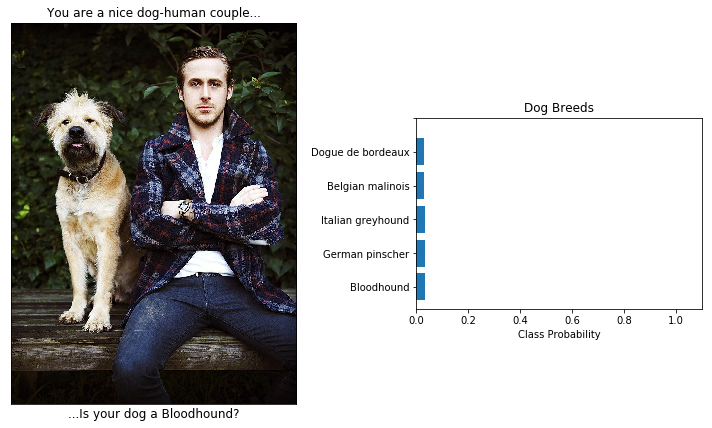

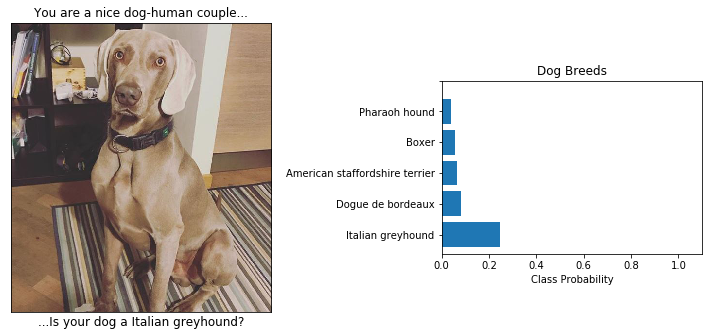

In [41]:
run_app('./luca_images/scooby.jpg')
run_app('./luca_images/ryan-gosling-dog-george.jpg')
run_app('./luca_images/dante.jpg')

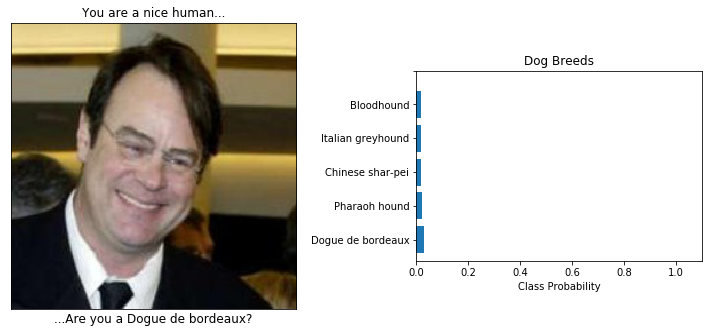

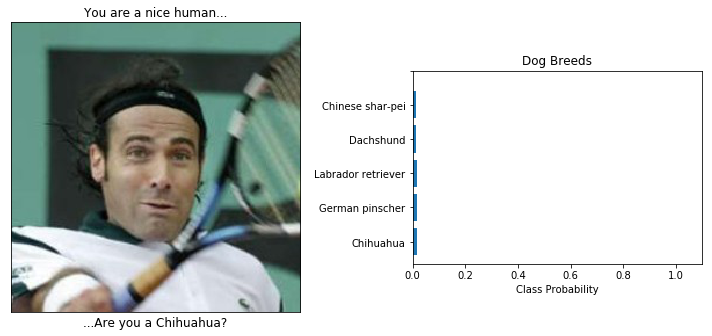

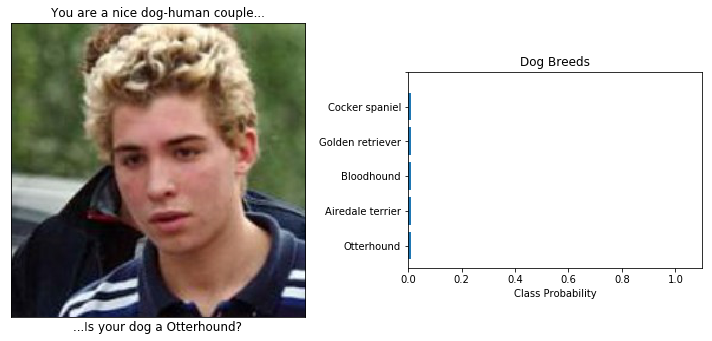

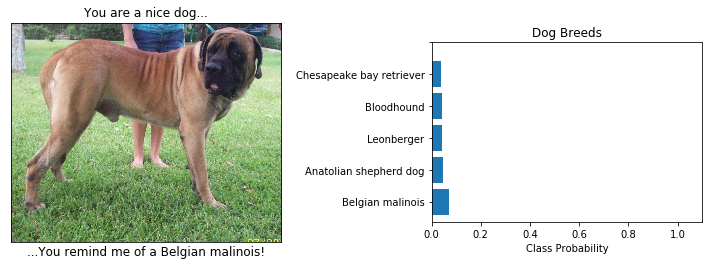

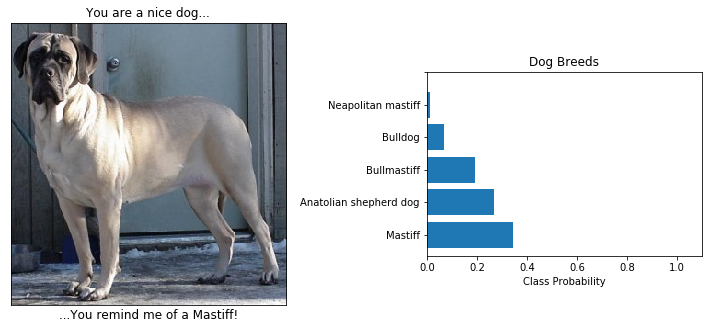

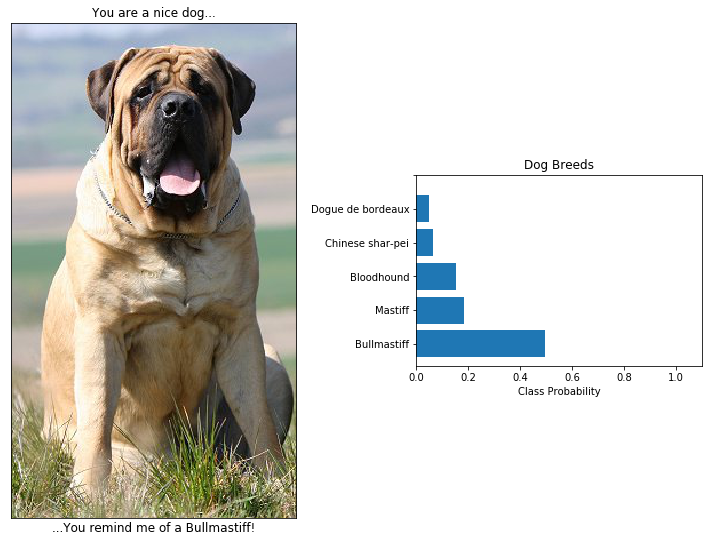

In [42]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.


## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)